In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

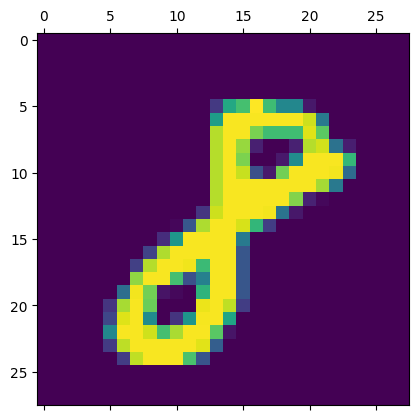

In [5]:
plt.matshow(X_train[31])

In [6]:
y_train[31]

8

In [7]:
X_train[31].shape

(28, 28)

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train.reshape(-1,28,28,1).shape

(60000, 28, 28, 1)

In [10]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [11]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
X_train = X_train/255
X_test = X_test/255

# CNN

In [13]:
X_train[0].shape

(28, 28, 1)

In [14]:
cnn = keras.models.Sequential([
    # Convolution + Relu --> Pooling --> Convolution + Relu --> Pooling --> flatten
    
    #cnn
    keras.layers.Conv2D(filters=28, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

In [16]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1803 - accuracy: 0.9466
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0614 - accuracy: 0.9817
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0426 - accuracy: 0.9869
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0307 - accuracy: 0.9903
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0217 - accuracy: 0.9932


In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0420 - accuracy: 0.9863


[0.042000431567430496, 0.986299991607666]

In [18]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [19]:
y_pred

array([[1.56513991e-09, 1.65266634e-09, 4.57056512e-06, ...,
        9.99995112e-01, 7.06323533e-08, 1.89968485e-08],
       [3.95030897e-09, 1.09979625e-08, 1.00000000e+00, ...,
        2.58791621e-12, 2.29035848e-08, 6.61973185e-11],
       [2.68919462e-06, 9.99817193e-01, 3.04407604e-06, ...,
        1.01258709e-04, 1.73988392e-05, 1.79431595e-07],
       ...,
       [6.10291982e-13, 9.31979494e-11, 6.29408114e-12, ...,
        5.00471700e-08, 4.03295360e-07, 5.62176012e-07],
       [9.92630755e-10, 4.39416316e-11, 2.30735960e-12, ...,
        1.14142779e-10, 2.97344995e-05, 5.33437383e-09],
       [2.95653432e-11, 5.58433551e-12, 1.78932300e-08, ...,
        7.57651266e-13, 1.48903618e-08, 6.55326488e-12]], dtype=float32)

In [24]:
y_predicted = [np.argmax(i) for i in y_pred]
y_predicted[:5]

[7, 2, 1, 0, 4]

In [27]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)

print(cm)

[[ 971    1    0    1    0    2    3    1    1    0]
 [   0 1132    1    0    0    0    1    0    1    0]
 [   1    3 1015    0    1    0    2    4    5    1]
 [   0    0    5  988    0    6    1    1    3    6]
 [   0    1    0    0  967    0    5    0    1    8]
 [   1    0    1    4    0  882    3    0    0    1]
 [   6    2    0    0    1    2  945    0    2    0]
 [   0    2    6    0    0    0    0 1016    1    3]
 [   4    0    2    0    0    2    2    2  955    7]
 [   1    2    0    0    7    2    0    5    0  992]]


<Axes: >

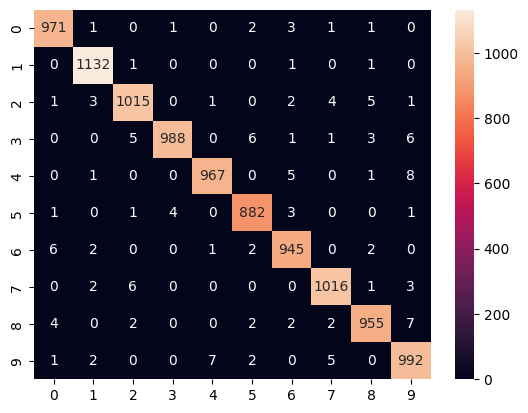

In [29]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")

In [31]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

